In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузка и обзор данных

In [2]:
# Download latest version
path = kagglehub.dataset_download("mar1mba/russian-sentiment-dataset")

print("Путь к файлу:", path)

Путь к файлу: C:\Users\1\.cache\kagglehub\datasets\mar1mba\russian-sentiment-dataset\versions\2


In [3]:
# Проверка корректности пути
print(os.listdir(path))

['sentiment_dataset.csv']


In [4]:
# Создание полного пути к файлу и выгрузка в DataFrame
file_path = os.path.join(path, 'sentiment_dataset.csv')
df = pd.read_csv(file_path)

In [5]:
# Просмотр датасета
df.head(10)

,text,label,src
0,"Пальто красивое, но пришло с дырой в молнии. П...",0,rureviews
1,"Очень долго шел заказ,ждала к новому году,приш...",0,rureviews
2,"Могу сказать одно, брюки нормальные, НО они бы...",0,rureviews
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0,rureviews
4,Мне не очень понравилось это платье. Размер ...,0,rureviews
5,"внешне качество хорошее, без запаха. силикон с...",0,rureviews
6,сшито не аккуратно. качество материала низкое....,0,rureviews
7,Кофта понравилась и доставлена была очень быст...,0,rureviews
8,Совершенно не понравилось так как совершенно н...,0,rureviews
9,Разочарована. Покупала до этого в этом магазин...,0,rureviews


In [6]:
df.shape

(290458, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290458 entries, 0 to 290457
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    290458 non-null  object
 1   label   290458 non-null  int64 
 2   src     290458 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.6+ MB


Колонка src (источник данных) не нужна, требуеся только целевая и тексты. Удаляем ненужную колонку

In [8]:
df_copy = df.drop('src', axis=1)

In [9]:
df_copy.head(10)

,text,label
0,"Пальто красивое, но пришло с дырой в молнии. П...",0
1,"Очень долго шел заказ,ждала к новому году,приш...",0
2,"Могу сказать одно, брюки нормальные, НО они бы...",0
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0
4,Мне не очень понравилось это платье. Размер ...,0
5,"внешне качество хорошее, без запаха. силикон с...",0
6,сшито не аккуратно. качество материала низкое....,0
7,Кофта понравилась и доставлена была очень быст...,0
8,Совершенно не понравилось так как совершенно н...,0
9,Разочарована. Покупала до этого в этом магазин...,0


Поиск и удаление дубликатов

In [10]:
df_copy['text'].duplicated().sum()

68

In [11]:
duplicates = df_copy['text'].duplicated()
df_copy[duplicates]

,text,label
238054,Очень маленький размер,2
238419,Все плохо,2
239173,Не стоит этих денег,2
239252,Низкое качество,2
239868,Маленькие,2
...,...,...
282931,Классная!,1
284942,хорошая,1
287755,спасибо,1
288998,Очень быстро,1


In [12]:
df_clean = df_copy.drop_duplicates(subset=['text'])
df_clean.shape

(290390, 2)

Поиск пропущенных значений

In [17]:
df_clean.isna().sum()

text     0
label    0
dtype: int64

#### Анализ целевой переменной

In [14]:
df_clean['label'].value_counts()

label
2    96963
1    96865
0    96562
Name: count, dtype: int64

Столбчатая диаграмма распределения классов

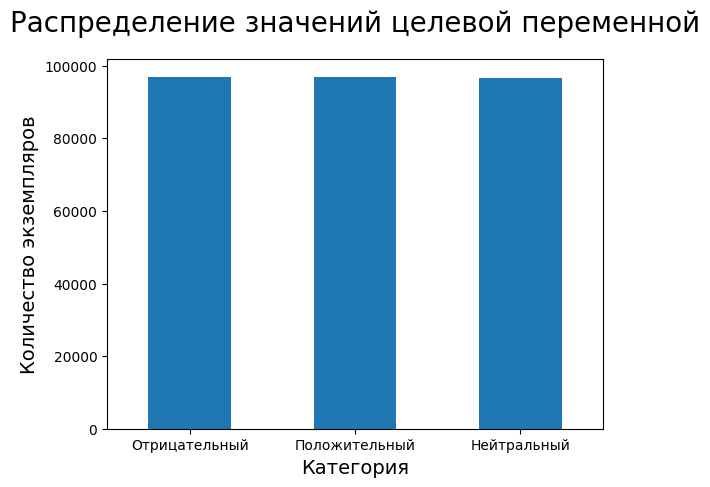

In [15]:
labels = {0:'Нейтральный', 1:'Положительный', 2:'Отрицательный'}

df_clean['label'].map(labels).value_counts().plot(kind='bar',
                                                rot = 0)
plt.title('Распределение значений целевой переменной', fontsize=20, pad=20)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Количество экземпляров', fontsize=14)
plt.show()

Статистика и диаграмма демонстрируют равномерное распределение значений по классам

#### Очистка и подготовка данных

In [2]:
import re
import nltk